# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities
Observations :
- The highest temperature is near 0 latitude near the equator and it decreses as the latitude decreses on both sides.
- For the cloudiness and wind spedd latitude doesnt seem to have much impact.
- The templerature is on on the ideal side at the negative latiude (Southern Hemisphere)

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
base_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | cumanayagua
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | harper
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | kamaishi
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | oum hadjer
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | obihiro
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | dongning
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | krasnoselkup
Processing Record 22 of Set 1

Processing Record 36 of Set 4 | port blair
Processing Record 37 of Set 4 | new norfolk
Processing Record 38 of Set 4 | husavik
Processing Record 39 of Set 4 | victoria
Processing Record 40 of Set 4 | lugovoy
Processing Record 41 of Set 4 | nabire
Processing Record 42 of Set 4 | abu zabad
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | melilla
Processing Record 45 of Set 4 | half moon bay
Processing Record 46 of Set 4 | prince rupert
Processing Record 47 of Set 4 | dunning
Processing Record 48 of Set 4 | grand gaube
Processing Record 49 of Set 4 | broken hill
Processing Record 0 of Set 5 | lebu
Processing Record 1 of Set 5 | hearst
Processing Record 2 of Set 5 | namatanai
Processing Record 3 of Set 5 | mazagao
Processing Record 4 of Set 5 | pontes e lacerda
Processing Record 5 of Set 5 | takoradi
Processing Record 6 of Set 5 | kaseda
Processing Record 7 of Set 5 | gamba
Processing Record 8 of Set 5 | phek
Processing Record 9 of Set 5 | lasa
Processing Record 10 of

Processing Record 26 of Set 8 | montague
Processing Record 27 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 28 of Set 8 | morondava
Processing Record 29 of Set 8 | visby
Processing Record 30 of Set 8 | karasburg
Processing Record 31 of Set 8 | muros
Processing Record 32 of Set 8 | zaozerne
Processing Record 33 of Set 8 | huarmey
Processing Record 34 of Set 8 | buchanan
Processing Record 35 of Set 8 | brae
Processing Record 36 of Set 8 | tokur
Processing Record 37 of Set 8 | dutse
Processing Record 38 of Set 8 | sokolo
Processing Record 39 of Set 8 | cocobeach
Processing Record 40 of Set 8 | dannenberg
Processing Record 41 of Set 8 | vershino-shakhtaminskiy
Processing Record 42 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 8 | port lincoln
Processing Record 44 of Set 8 | ojinaga
Processing Record 45 of Set 8 | terrace
Processing Record 46 of Set 8 | zhezkazgan
Processing Record 47 of Set 8 | mount isa
Processing Record 48 of Set 8 | cock

Processing Record 15 of Set 12 | puri
Processing Record 16 of Set 12 | khorixas
Processing Record 17 of Set 12 | slave lake
Processing Record 18 of Set 12 | yauya
Processing Record 19 of Set 12 | paita
Processing Record 20 of Set 12 | belousovka
Processing Record 21 of Set 12 | ponta delgada
Processing Record 22 of Set 12 | miri
Processing Record 23 of Set 12 | shingu
Processing Record 24 of Set 12 | kropotkin
Processing Record 25 of Set 12 | bitam
Processing Record 26 of Set 12 | peleduy
Processing Record 27 of Set 12 | romitan
Processing Record 28 of Set 12 | caernarfon
Processing Record 29 of Set 12 | katete
Processing Record 30 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 31 of Set 12 | itamaraca
Processing Record 32 of Set 12 | lusambo
Processing Record 33 of Set 12 | nokia
Processing Record 34 of Set 12 | namibe
Processing Record 35 of Set 12 | yangambi
Processing Record 36 of Set 12 | lilongwe
Processing Record 37 of Set 12 | turukhansk
Processing Record 38 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame.from_records(city_data)
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [10]:
# Display sample data
city_data_df = city_data_df.rename(columns={"Lat":"Latitude","Lng":"Longitude"})
city_data_df.sample(50)


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
381,bella vista,36.4295,-94.2316,18.91,36,0,4.63,US,1680121999
398,paamiut,61.9940,-49.6678,-9.27,75,9,2.35,GL,1680122006
162,sao paulo de olivenca,-3.3783,-68.8725,27.55,85,62,1.08,BR,1680121921
366,lalmohan,22.3384,90.7419,24.45,88,0,2.72,BD,1680121990
221,touros,-5.1989,-35.4608,26.36,78,7,3.53,BR,1680121946
516,kitgum,3.2783,32.8867,21.41,77,72,0.76,UG,1680122038
54,kruisfontein,-34.0033,24.7314,13.82,74,49,6.20,ZA,1680121898
336,khatassy,61.9036,129.6383,-12.01,95,98,1.66,RU,1680121980
545,cururupu,-1.8283,-44.8683,24.15,95,94,1.39,BR,1680121969
412,bilma,18.6853,12.9164,25.37,9,1,3.18,NE,1680122011


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,27.38,87,100,5.66,US,1680121787
1,cumanayagua,22.1494,-80.2022,31.23,38,11,0.62,CU,1680121875
2,tuktoyaktuk,69.4541,-133.0374,-18.00,71,0,2.06,CA,1680121875
3,harper,4.3750,-7.7169,26.69,86,27,2.65,LR,1680121875
4,hobart,-42.8794,147.3294,12.92,74,75,9.77,AU,1680121793


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

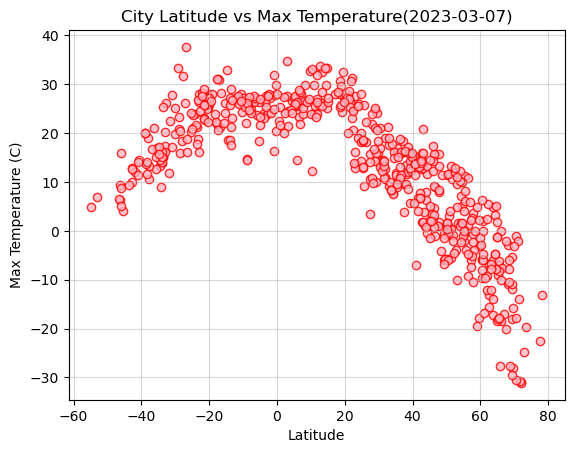

In [13]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Latitude"],city_data_df["Max Temp"], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature(2023-03-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle="-",alpha = 0.5)
# Save the figure
plt.savefig("output_data/Latitude vs Max Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

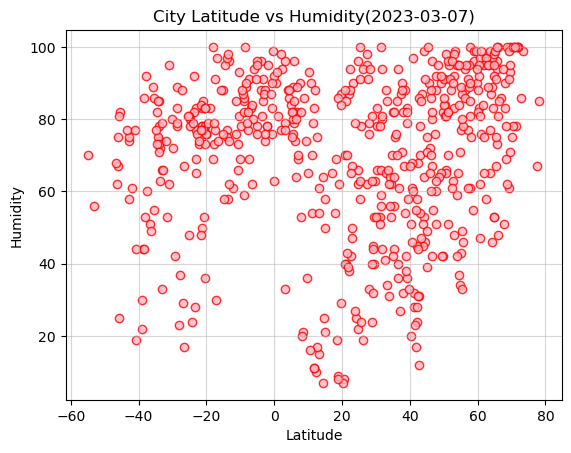

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Latitude"],city_data_df["Humidity"], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity(2023-03-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle="-",alpha = 0.5)

# Save the figure
plt.savefig("output_data/Latitude vs Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

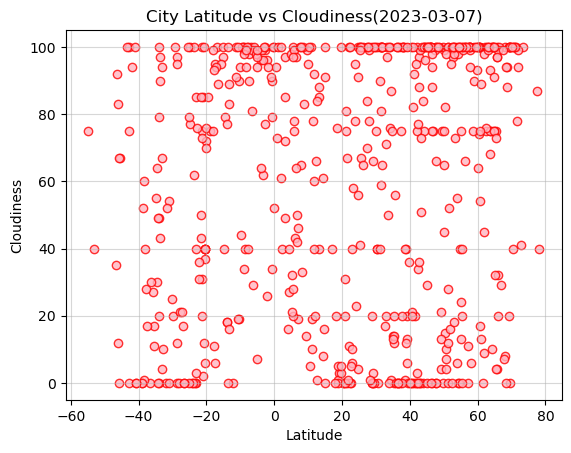

In [15]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Latitude"],city_data_df["Cloudiness"], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness(2023-03-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle="-",alpha = 0.5)

# Save the figure
plt.savefig("output_data/Latitude vs Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

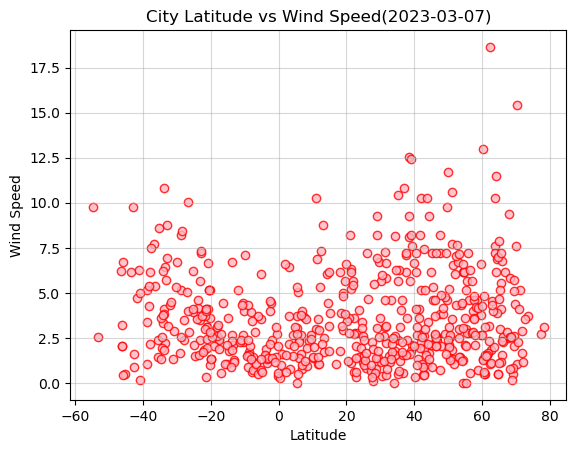

In [16]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Latitude"],city_data_df["Wind Speed"], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed(2023-03-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle="-",alpha = 0.5)

# Save the figure
plt.savefig("output_data/Latitude vs Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderrr) = linregress(x,y)
    print(f"r-squared value is {round(st.pearsonr(x,y)[0],2)}")
    regress_values = round(slope,2) * x + round(intercept,2)
    equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y,facecolor = "lightpink",edgecolor = "red",alpha = 0.8)
    plt.plot(x, regress_values, color='red')
    return equation
    

In [18]:
def annotation(equation, x_value,y_value):
     plt.annotate(equation,(x_value,y_value), color='black')

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Latitude"] >=0 ]
# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,27.38,87,100,5.66,US,1680121787
1,cumanayagua,22.1494,-80.2022,31.23,38,11,0.62,CU,1680121875
2,tuktoyaktuk,69.4541,-133.0374,-18.00,71,0,2.06,CA,1680121875
3,harper,4.3750,-7.7169,26.69,86,27,2.65,LR,1680121875
5,kamaishi,39.2667,141.8833,5.61,83,6,2.09,JP,1680121876


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Latitude"] < 0 ]


# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,hobart,-42.8794,147.3294,12.92,74,75,9.77,AU,1680121793
11,mataura,-46.1927,168.8643,6.38,67,12,2.03,NZ,1680121880
12,atuona,-9.8000,-139.0333,27.20,78,44,7.12,PF,1680121880
13,arraial do cabo,-22.9661,-42.0278,27.98,69,0,7.20,BR,1680121880
15,cape town,-33.9258,18.4232,16.18,78,20,4.12,ZA,1680121751


###  Temperature vs. Latitude Linear Regression Plot

r-squared value is -0.88


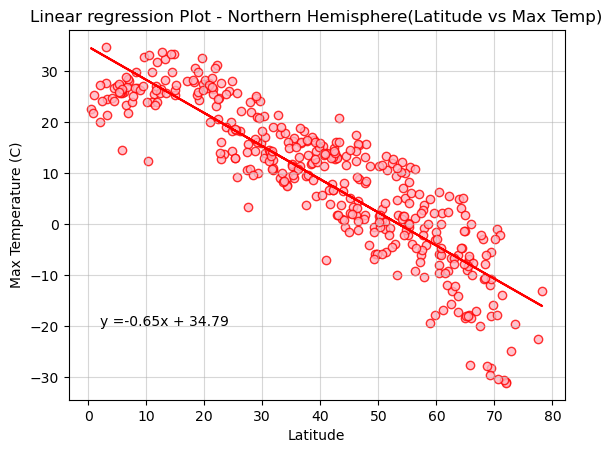

In [21]:
# Linear regression on Northern Hemisphere
line_equation = linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Max Temp"])
annotation(line_equation,2,-20)
plt.title("Linear regression Plot - Northern Hemisphere(Latitude vs Max Temp)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Northern Hemisphere(Latitude vs Max Temp).png")


r-squared value is 0.7


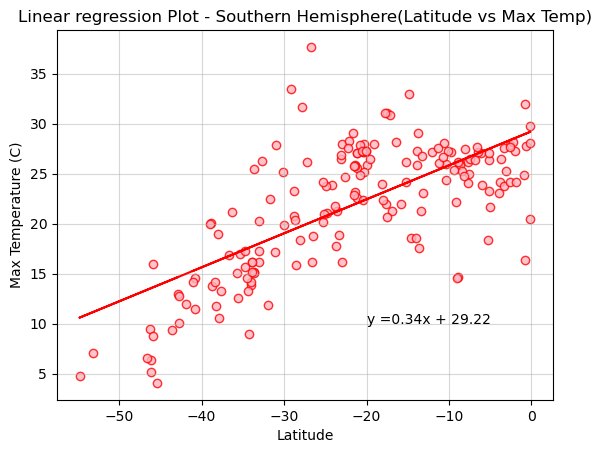

In [22]:
# Linear regression on Southern Hemisphere
line_equation = linear_regression(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp"])
annotation(line_equation,-20,10)
plt.title("Linear regression Plot - Southern Hemisphere(Latitude vs Max Temp)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Southern Hemisphere(Latitude vs Max Temp).png")

**Discussion about the linear relationship:**  For the Northern hemisphere, there is a strong negative co relation between the latitude and max temperature. It is observed from the graph as well as the latitude increases the max temperature decreases.
For the southern hemisphere the co relation is moderately positive.

### Humidity vs. Latitude Linear Regression Plot

r-squared value is 0.3


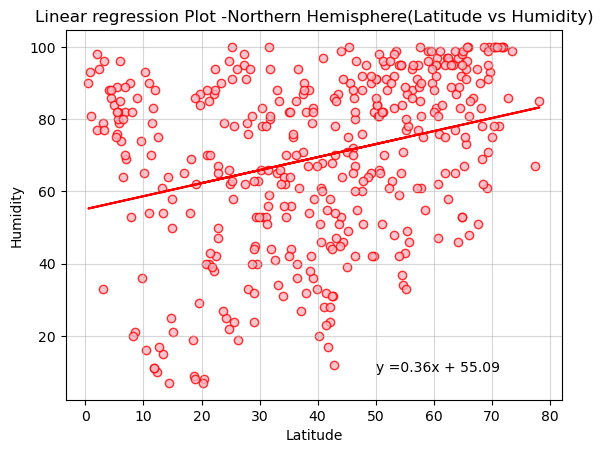

In [23]:
# Northern Hemisphere
line_equation = linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Humidity"])
annotation(line_equation,50,10)
plt.title("Linear regression Plot -Northern Hemisphere(Latitude vs Humidity)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Northern Hemisphere(Latitude Humidity).png")

r-squared value is 0.41


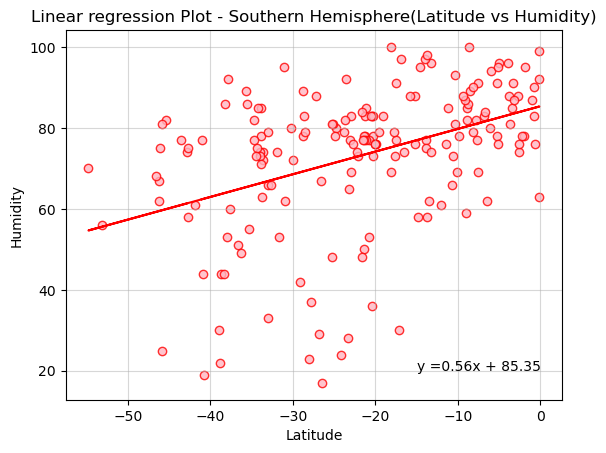

In [24]:
# Southern Hemisphere
line_equation = linear_regression(southern_hemi_df["Latitude"], southern_hemi_df["Humidity"])
annotation(line_equation,-15,20)
plt.title("Linear regression Plot - Southern Hemisphere(Latitude vs Humidity)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Southern Hemisphere(Latitude vs Humidity).png")

**Discussion about the linear relationship:** The correlation between latitude and humidity for both southern and northern hemisphere is towards the less positive.

### Cloudiness vs. Latitude Linear Regression Plot

r-squared value is 0.16


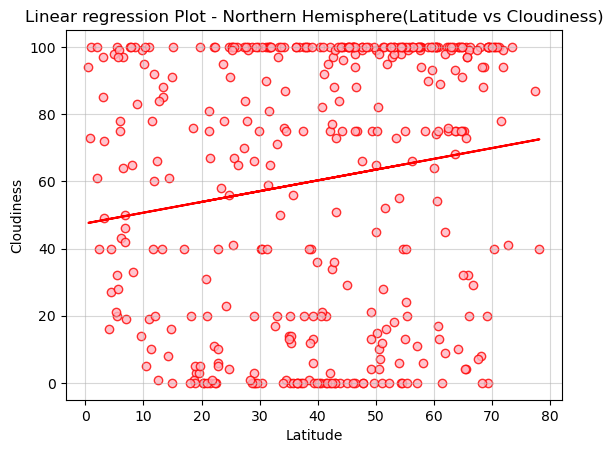

In [25]:
# Northern Hemisphere
line_equation = linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Cloudiness"])
annotation(line_equation,2,-20)
plt.title("Linear regression Plot - Northern Hemisphere(Latitude vs Cloudiness)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Northern Hemisphere(Latitude vs Cloudiness).png")

r-squared value is 0.37


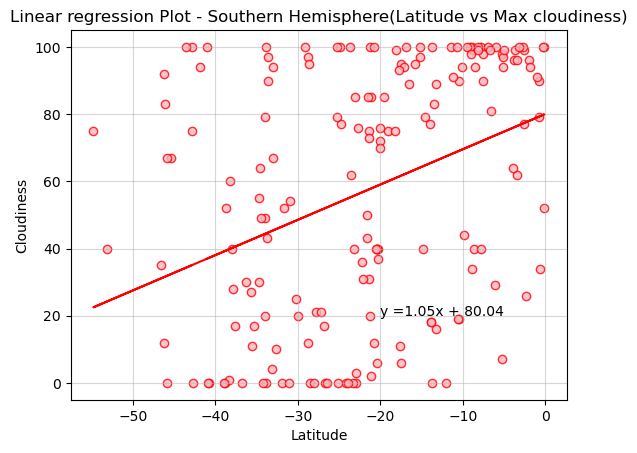

In [26]:
# Southern Hemisphere
line_equation = linear_regression(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness"])
annotation(line_equation,-20,20)
plt.title("Linear regression Plot - Southern Hemisphere(Latitude vs Max cloudiness)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Southern Hemisphere(Latitude vs Cloudiness).png")

**Discussion about the linear relationship:** For the Northern hemisphere there is very less correlation between cloudiness and latitude. For the southern hemisphere the correlation between latitude and cloudiness is moderately positive.

### Wind Speed vs. Latitude Linear Regression Plot

r-squared value is 0.04


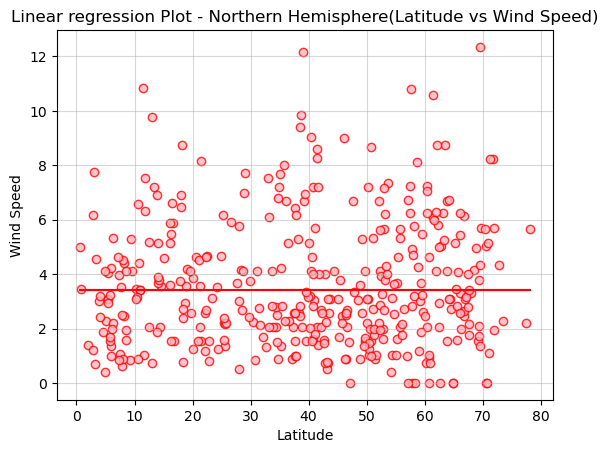

In [135]:
# Northern Hemisphere
line_equation = linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Wind Speed"])
annotation(line_equation,2,-20)
plt.title("Linear regression Plot - Northern Hemisphere(Latitude vs Wind Speed)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Northern Hemisphere(Latitude vs Wind Speed).png")

r-squared value is -0.38


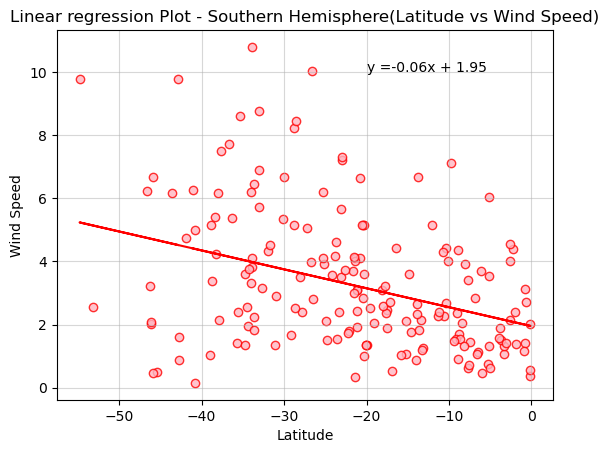

In [27]:
# Southern Hemisphere
line_equation = linear_regression(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"])
annotation(line_equation,-20,10)
plt.title("Linear regression Plot - Southern Hemisphere(Latitude vs Wind Speed)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Southern Hemisphere(Latitude vs Wind Speed).png")

**Discussion about the linear relationship:** The correlation between latitude and wind speed is moderately negative at the southern hemisphere and almost negiligible at the Northern hemisphere.